### Proper train test splitting
To implement proper training and testing splits we need to evaluate the time of the dataset, luckily in behaviors with individual counts we have a time column, so we just need to separate the behaviors into the individual stuff, and then sort by time.

In [22]:
import pandas as pd
import numpy as np
import ExploratoryAnalysis.data_processing_modules as dpm

In [23]:
dataset = pd.read_csv('MIND_large/csv/tensorflowDataset.csv', index_col=0)
dataset.head()


,user_id,time,news_id,category,sub_category,title,abstract,interaction_type,score
0,U134050,11/15/2019 8:55:22 AM,N91737,movies,movienews,13 Reasons Why's Christian Navarro Slams Disne...,13 Reasons Why's Christian Navarro Slams Littl...,impression,0
1,U134050,11/15/2019 8:55:22 AM,N30206,lifestyle,lifestylebuzz,Cows swept away by Hurricane Dorian found aliv...,A trio of wild cows believed to have been swep...,impression,0
2,U134050,11/15/2019 8:55:22 AM,N54368,news,newsus,South Carolina teen gets life in prison for de...,"Jesse Osborne, the teenager responsible for a ...",impression,0
3,U134050,11/15/2019 8:55:22 AM,N117802,tv,tv-celebrity,"Pete Davidson, Kaia Gerber Are Dating, Trying ...","Pete Davidson, Kaia Gerber Are Dating, Trying ...",impression,0
4,U134050,11/15/2019 8:55:22 AM,N18190,lifestyle,shop-holidays,30 Best Black Friday Deals from Costco,Costco members love shopping at the warehouse ...,impression,0


In [26]:
dataset = dpm.modify_hourly(dataset)

['09', '12', '10', '06', '13', ..., '18', '21', '01', '02', '23']
Length: 24
Categories (24, object): ['01' < '02' < '03' < '04' ... '21' < '22' < '23' < '00']

In [ ]:
news = pd.read_csv("MIND_large/csv/news.csv")

In [ ]:
# might want to pass in grouped by dataset for user_id? or at this point do we even need to make a full matrix if were going to make one out of clusters!
news_data = {news_id : np.full(255990, 0, dtype='int8') for news_id in news}
def populate_dictionaries(dataset):


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='total'>

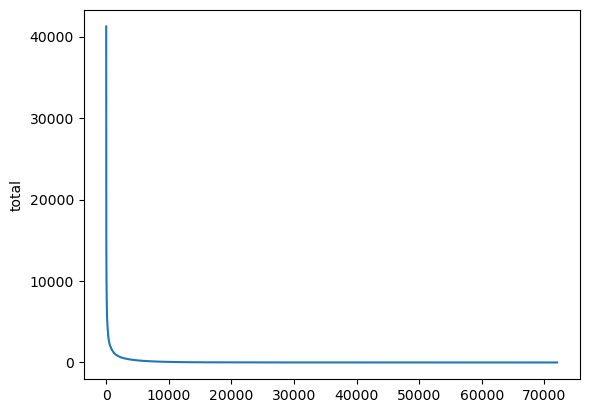

In [37]:
article_popularity = pd.read_csv('MIND_large/csv/news_with_popularity.csv', index_col=0).drop(columns=['abstract_entities', 'title_entities', 'category', 'sub_category', 'title', 'abstract'])
article_popularity['total'] = article_popularity['popularity_impression'] + article_popularity['popularity_history']
article_popularity = article_popularity.sort_values(by='total', ascending=False).reset_index(drop=True)
article_popularity
sns.lineplot(data=article_popularity['total'])
# article_popularity_long = article_popularity.melt(id_vars='news_id', value_vars=['popularity_impression', 'popularity_history'], value_name='popularity')
# article_popularity_long

/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


KeyboardInterrupt: 

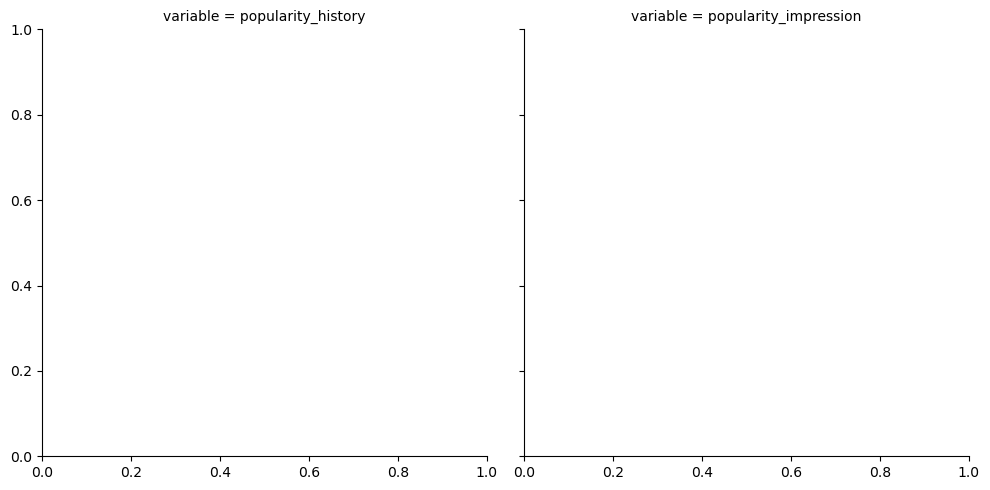

In [32]:
apls = article_popularity_long.sort_values(by=['variable','popularity'], ascending=[True, False])
# Create a seaborn FacetGrid for the visualization.
g = sns.FacetGrid(apls, col='variable', sharex=False, height=5, aspect=1, hue='news_id')

# Apply a barplot to each facet and set the labels and titles.
g.map(sns.barplot, 'popularity','variable')
g.set_axis_labels(x_var="Count of interactions", y_var='Categories')
g.set_titles("User {col_name}")
g.add_legend(title='Categories')

plt.show()